### Imports

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
import time
from sklearn.decomposition import PCA

### Data Loading

In [2]:
mnist_data = fetch_openml('mnist_784', version=1)

images, labels = mnist_data['data'], mnist_data['target']

In [3]:
images = images[:20000]
labels = labels[:20000]

### Plot Some Examples of Original Data

In [4]:
def plot(num, data, reshape_size=28):
    """
    num: number of examples to plot, up to 10 for optimal layout
    data: data used for plotting, data.shape=(num_rows, num_features)
    reshape_size: to plot images we need 2d data, so reshaping is necessary, 
                default value 28 works for (.,784) images
    """
    fig, axes = plt.subplots(1,num, figsize=(12,8))
    for i,ax in enumerate(axes):
        ax.imshow(data[i].reshape(reshape_size,reshape_size))
        ax.axis('off')
    plt.tight_layout()

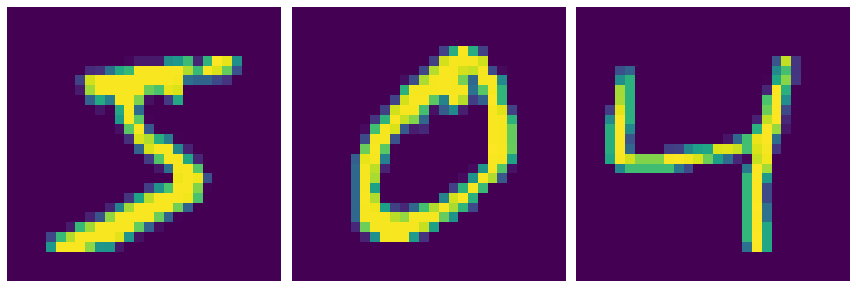

In [5]:
plot(3,images)


### Train a Classifier Model on Original Data (784 features)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, random_state=0)

In [7]:
clf = SGDClassifier(loss='log')
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [8]:
%timeit clf.predict(X_test)
print("Test Score =", clf.score(X_test, y_test))

9.5 ms ± 95.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Test Score = 0.8678


### Selecting Proper Number of Components

In [9]:
pca = PCA(n_components=784, random_state=0)
pca.fit(images)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.arange(1,785)

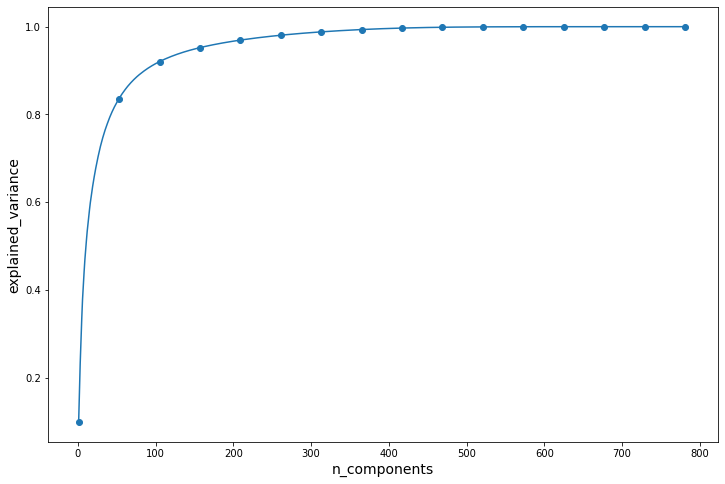

In [10]:
plt.figure(figsize=(12,8))
stride = int(len(np.arange(1,785)) / 15)
plt.plot(num_components, explained_variance, marker='o', markevery=stride)
plt.xlabel("n_components", fontsize=14)
plt.ylabel("explained_variance", fontsize=14);

### Plot Some Examples of Reduced Data

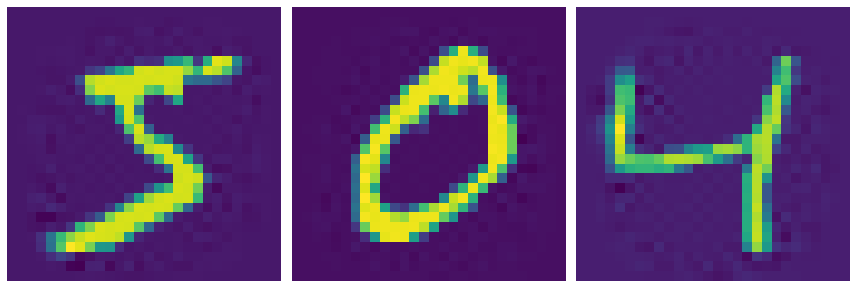

In [11]:
pca = PCA(n_components=400)
images_transformed = pca.fit_transform(images)
images_inverse = pca.inverse_transform(images_transformed)

plot(3, images_inverse)

### Train a Classifier Model on Reduced Data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(images_transformed, labels, random_state=0)

In [13]:
clf = SGDClassifier(loss='log')
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [14]:
%timeit clf.predict(X_test)
print("Test Score =", clf.score(X_test, y_test))

5.39 ms ± 925 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Test Score = 0.8378


### Visualize 2 Component Data

In [15]:
images = images[:10000]
labels = labels[:10000]

In [16]:
pca = PCA(2)
images_transformed = pca.fit_transform(images)

In [17]:
# just changing the types of labels from string to int for plotting
labels_int = labels.astype(int)
labels_int

array([5, 0, 4, ..., 6, 9, 7])

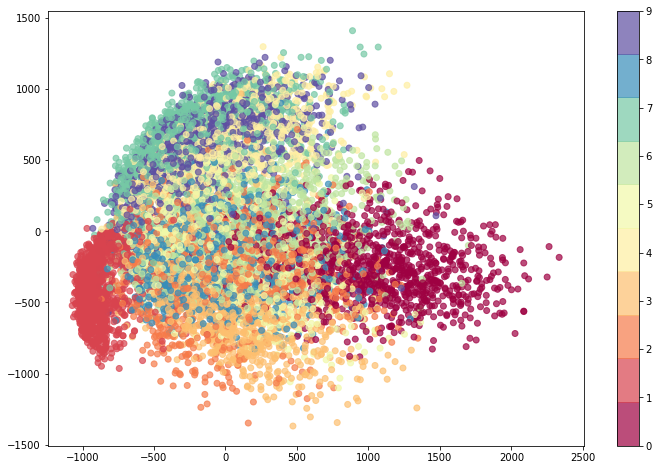

In [18]:
# as our feature space is 2d now, we can use col1 and col2 to plot our data
# this scatter plot gives some visual insight on reduced data
plt.figure(figsize=(12,8))
plt.scatter(images_transformed[:,0], images_transformed[:,1], c=labels_int, alpha=0.7, 
            cmap=plt.cm.get_cmap('Spectral',10))
plt.colorbar();

## Noise Reduction

In [19]:
noise_var = 15
noisy = np.random.normal(images, noise_var)

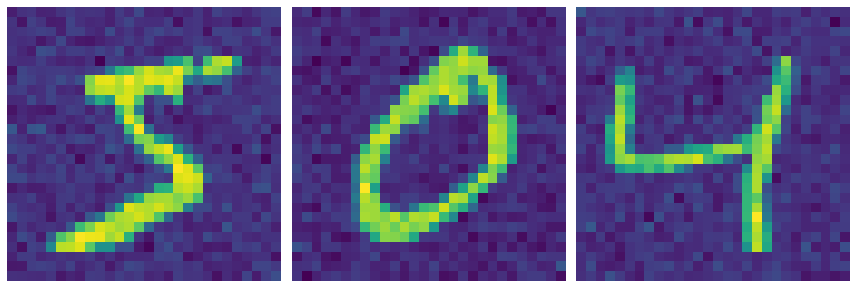

In [20]:
plot(3, noisy)

In [21]:
pca = PCA(0.9)
images_transformed = pca.fit_transform(noisy)
images_inverse = pca.inverse_transform(images_transformed)

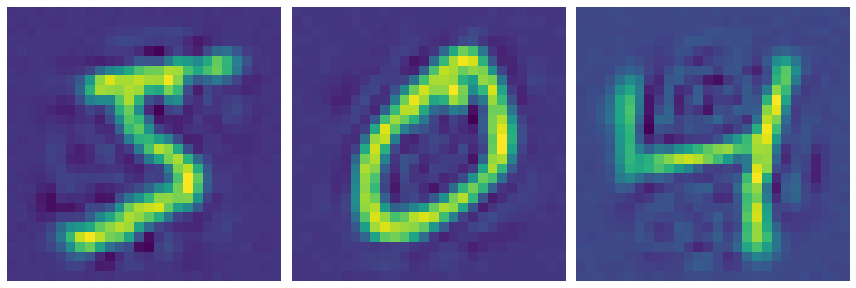

In [22]:
plot(3, images_inverse)